In [117]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
import openturns as ot
import math


In [2]:
data = pd.read_csv('log_return_data.csv')
data


,log_return_vkco,log_return_tcs_il,log_return_poly_il,log_return_five_il
0,-0.012110,-0.004162,-0.003712,-0.013377
1,-0.035292,0.000000,-0.029352,-0.024070
2,0.011583,0.002083,-0.013279,0.007894
3,-0.006740,0.004154,0.025964,-0.002916
4,-0.009709,0.015425,-0.010984,-0.007034
...,...,...,...,...
248,-0.007648,0.018653,0.030041,0.010193
249,0.019012,0.044184,0.029452,-0.006216
250,0.018657,0.038540,0.008584,0.036732
251,0.046940,0.035287,0.042393,0.000000


In [123]:
distribution = ot.MeixnerDistribution(1.0, 0.25, 1.0, 0.0)
sample = distribution.getSample(252)


In [124]:
print('alpha:', distribution.getAlpha())

alpha: 0.5


In [109]:
def get_x_y_from_dataframe(dataframe, name, N):
    (y, x, _) = plt.hist(dataframe[name], bins=N)
    plt.close()
    x = x[:-1]
    x = x / sum(abs(x))
    y = y / sum(abs(y))
    return x, y

In [110]:
def get_x_y(dataframe, N):
    (y, x, _) = plt.hist(dataframe, bins=N)
    plt.close()
    x = x[:-1]
    x = x / sum(abs(x))
    y = y / sum(abs(y))
    return x, y

Ks_2sampResult(statistic=0.22, pvalue=0.17858668181221732)

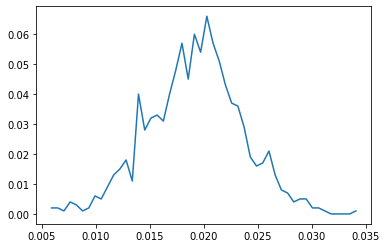

In [142]:
distribution = ot.MeixnerDistribution(0.47, 0.01, 1.7, 2.0)
sample = distribution.getSample(1000)

my_x, my_y = get_x_y_from_dataframe(data, 'log_return_vkco', 50)
gen_x, gen_y = get_x_y(sample, 50)
plt.plot(gen_x, gen_y)

stats.ks_2samp(my_y, gen_y)

In [133]:
print(my_y)
print(gen_y)

[0.00395257 0.         0.         0.00395257 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00395257 0.         0.00395257 0.         0.00395257 0.01581028
 0.         0.         0.00790514 0.01185771 0.01185771 0.01976285
 0.01581028 0.01976285 0.04347826 0.06719368 0.03952569 0.08300395
 0.09881423 0.09090909 0.09881423 0.1027668  0.04347826 0.03952569
 0.02766798 0.02371542 0.02371542 0.01976285 0.01976285 0.01185771
 0.01185771 0.00395257 0.00395257 0.00790514 0.00395257 0.00395257
 0.00395257 0.00395257]
[0.00396825 0.00396825 0.         0.00396825 0.         0.
 0.00793651 0.00396825 0.00396825 0.00396825 0.00793651 0.01587302
 0.01587302 0.01587302 0.01587302 0.01984127 0.01190476 0.02777778
 0.02777778 0.03571429 0.05555556 0.04761905 0.04761905 0.07142857
 0.03968254 0.04365079 0.03174603 0.04761905 0.05555556 0.03968254
 0.03174603 0.01984127 0.04761905 0.03174603 0.01587302 0.01587302
 0.01587302 0.00396825 0.01984127 0.01587302 0.01190476 0.0119

In [135]:
print(my_y)
print(gen_y)

[0.00395257 0.         0.         0.00395257 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00395257 0.         0.00395257 0.         0.00395257 0.01581028
 0.         0.         0.00790514 0.01185771 0.01185771 0.01976285
 0.01581028 0.01976285 0.04347826 0.06719368 0.03952569 0.08300395
 0.09881423 0.09090909 0.09881423 0.1027668  0.04347826 0.03952569
 0.02766798 0.02371542 0.02371542 0.01976285 0.01976285 0.01185771
 0.01185771 0.00395257 0.00395257 0.00790514 0.00395257 0.00395257
 0.00395257 0.00395257]
[0.00396825 0.         0.         0.         0.         0.
 0.         0.00793651 0.01190476 0.00396825 0.01587302 0.00396825
 0.02777778 0.01190476 0.01587302 0.02777778 0.02777778 0.02777778
 0.05952381 0.02380952 0.03571429 0.0515873  0.05952381 0.07539683
 0.07539683 0.06349206 0.0515873  0.05555556 0.04365079 0.02777778
 0.01984127 0.03968254 0.01984127 0.03571429 0.01190476 0.01190476
 0.01190476 0.00793651 0.00793651 0.00396825 0.         0.0039